In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import pickle

In [2]:
df_train = pd.read_csv('../data/processed/clean_train_data.csv')
df_test = pd.read_csv('../data/processed/clean_test_data.csv')

In [3]:
reg = setup(data = df_train, 
                   train_size=0.8,  
                   target = 'SalePrice', 
                   session_id=42,
                  )

,Description,Value
0,session_id,42
1,Target,SalePrice
2,Original Data,"(1326, 49)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,37
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1060, 204)"


In [4]:
best = compare_models(include= ['rf', 
                                'gbr', 
                                'dt', 
                                'lr', 
                                'ada',
                                'lasso'
                               ])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2481,0.1254,0.3525,0.8662,0.1777,1.4699,0.1650
rf,Random Forest Regressor,0.2579,0.1422,0.3755,0.8489,0.1857,1.4581,0.9390
ada,AdaBoost Regressor,0.3339,0.2080,0.4537,0.7788,0.2247,1.7056,0.1390
dt,Decision Tree Regressor,0.3797,0.2953,0.5409,0.6860,0.2544,2.4262,0.0160
lasso,Lasso Regression,0.7517,0.9537,0.9743,-0.0108,0.5380,1.2672,0.0090
lr,Linear Regression,0.6309,10.4313,2.6357,-11.0164,0.3442,3.2375,0.0220


In [6]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2624,0.1260,0.3550,0.8854,0.1711,0.9157
1,0.2745,0.1659,0.4073,0.8138,0.1922,4.2310
2,0.2169,0.0904,0.3006,0.8947,0.1577,0.9300
3,0.2451,0.1394,0.3733,0.8579,0.1813,0.6432
4,0.2492,0.1177,0.3431,0.8684,0.1692,0.9831
5,0.2535,0.1320,0.3633,0.8354,0.1792,0.9527
6,0.2249,0.1102,0.3319,0.8690,0.1709,1.8087
7,0.2851,0.1620,0.4025,0.8737,0.2048,0.7091
8,0.2268,0.0917,0.3028,0.9004,0.1578,1.3455


In [7]:
tune_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2567,0.1389,0.3727,0.8737,0.1706,0.7896
1,0.2618,0.1463,0.3825,0.8358,0.1805,4.0181
2,0.2238,0.0904,0.3006,0.8947,0.1514,0.9740
3,0.2751,0.1679,0.4098,0.8288,0.1903,0.6391
4,0.2537,0.1228,0.3505,0.8627,0.1768,1.2353
5,0.2412,0.1151,0.3393,0.8564,0.1774,1.0546
6,0.1987,0.0922,0.3037,0.8903,0.1519,1.3632
7,0.2822,0.1766,0.4202,0.8623,0.2026,0.6323
8,0.2275,0.0949,0.3081,0.8970,0.1554,1.2444


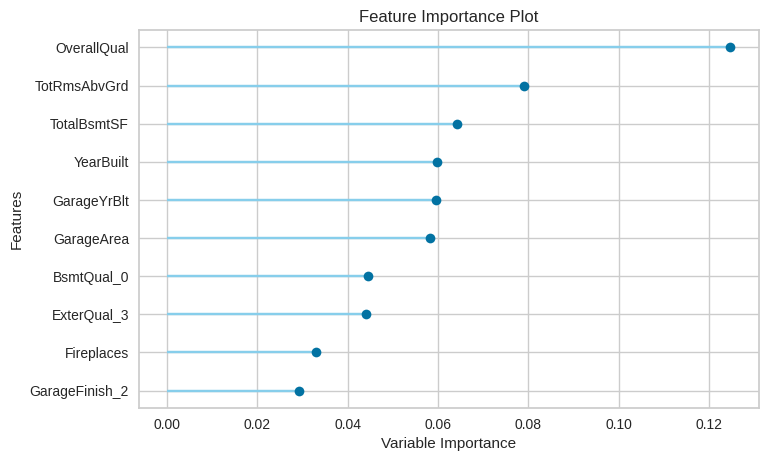

In [8]:
plot_model(tune_gbr, plot='feature')

In [15]:
model = finalize_model(tune_gbr)
predictions = predict_model(model, data = df_test)

In [30]:
predictions.index.values

array([   0,    1,    2, ..., 1316, 1317, 1318])

In [19]:
predictions['Label']

0      -0.893603
1      -0.431410
2      -0.133517
3       0.011389
4       0.156308
          ...   
1314   -0.265635
1315   -1.274508
1316   -1.236835
1317   -0.484304
1318    0.713154
Name: Label, Length: 1319, dtype: float64

In [23]:
picklefile = open('../models/data-cleaning-models/scaler_y.pkl', 'rb')
scaler_y = pickle.load(picklefile)

In [24]:
scaler_y

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaler_y.inverse_transform(predictions['Label'])

array([114520.71863316, 147176.391351  , 168223.63870553, ...,
        90270.15888126, 143439.21039367, 228044.02740827])

In [26]:
file = open('../models/ml-models/final_gbr.pkl', 'wb')
pickle.dump(final_gbr, file)

In [34]:
pred = pd.DataFrame({
        "SalePrice": scaler_y.inverse_transform(predictions['Label'])
    })
pred.to_csv('../data/prediction/predictions.csv', index=False)